c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\KOUST\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
15/15 - 2s - 108ms/step - loss: 0.1116 - val_loss: 0.5800
Epoch 2/100
15/15 - 0s - 5ms/step - loss: 0.1094 - val_loss: 0.5295
Epoch 3/100
15/15 - 0s - 5ms/step - loss: 0.1066 - val_loss: 0.4941
Epoch 4/100
15/15 - 0s - 5ms/step - loss: 0.1020 - val_loss: 0.4624
Epoch 5/100
15/15 - 0s - 5ms/step - loss: 0.0968 - val_loss: 0.4312
Epoch 6/100
15/15 - 0s - 5ms/step - loss: 0.0913 - val_loss: 0.3992
Epoch 7/100
15/15 - 0s - 5ms/step - loss: 0.0855 - val_loss: 0.3660
Epoch 8/100
15/15 - 0s - 5ms/step - loss: 0.0792 - val_loss: 0.3308
Epoch 9/100
15/15 - 0s - 4ms/step - loss: 0.0725 - val_loss: 0.2936
Epoch 10/100
15/15 - 0s - 5ms/step - loss: 0.0650 - val_loss: 0.2530
Epoch 11/100
15/15 - 0s - 5ms/step - loss: 0.0566 - val_loss: 0.2078
Epoch 12/100
15/15 - 0s - 5ms/step - loss: 0.0472 - val_loss: 0.1571
Epoch 13/100
15/15 - 0s - 5ms/step - loss: 0.0370 - val_loss: 0.1008
Epoch 14/100
15/15 - 0s - 5ms/step - loss: 0.0255 - val_loss: 0.0393
Epoch 15/100
15/15 - 0s - 5ms/step - loss

14:37:51 - cmdstanpy - INFO - Chain [1] start processing
14:37:51 - cmdstanpy - INFO - Chain [1] done processing


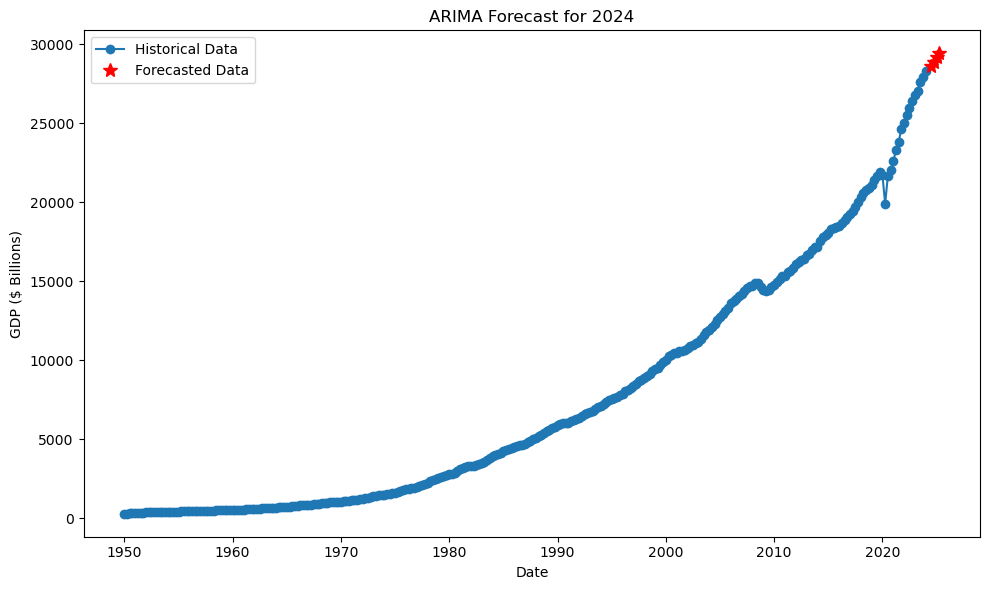

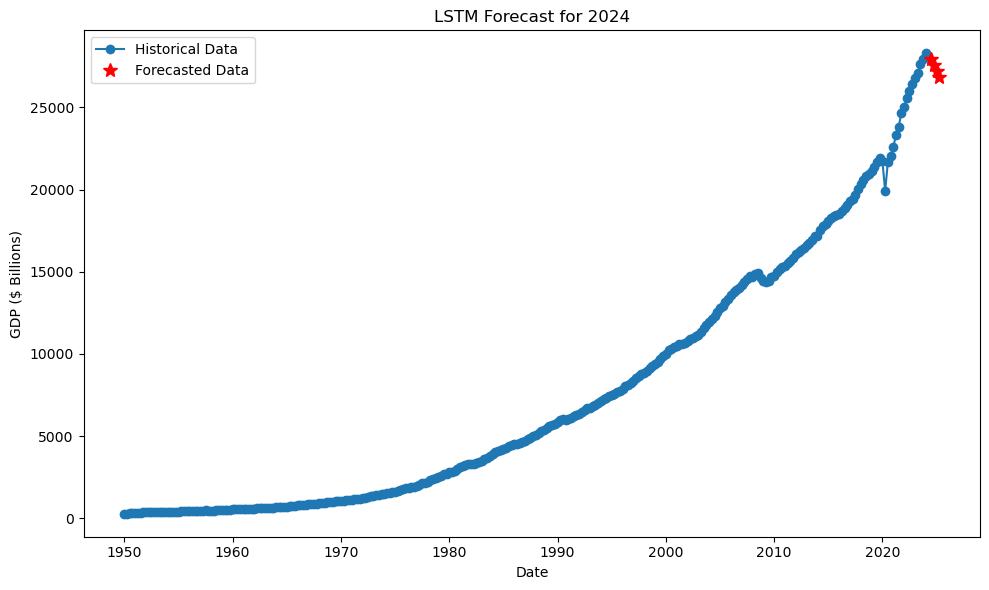

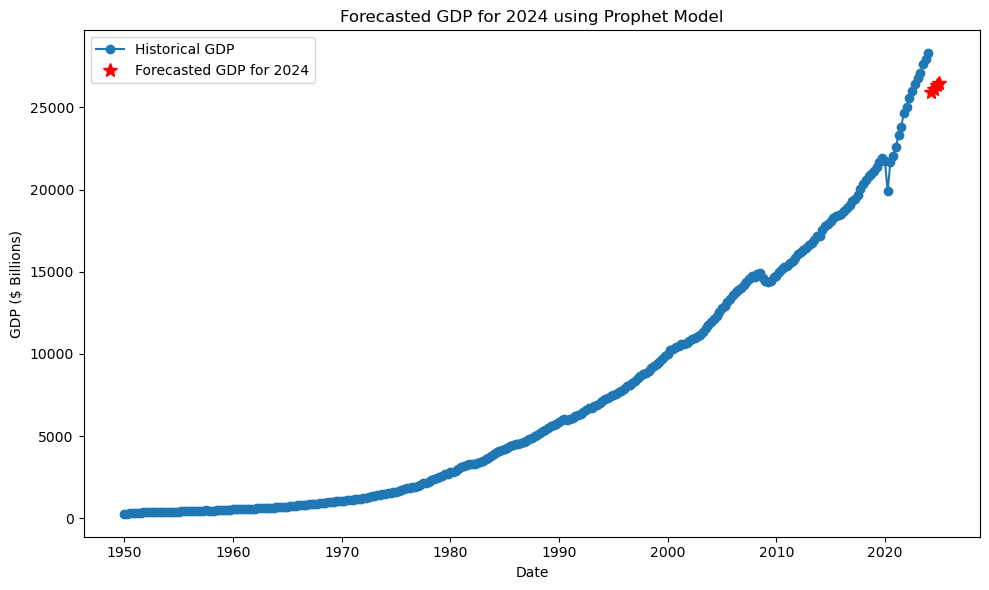


ARIMA Forecast for 2024:
Forecasted GDP for 2024Q2: $28597.21B (1.11% from last observed GDP)
Forecasted GDP for 2024Q3: $28877.53B (2.10% from last observed GDP)
Forecasted GDP for 2024Q4: $29179.80B (3.17% from last observed GDP)
Forecasted GDP for 2025Q1: $29429.72B (4.05% from last observed GDP)

LSTM Forecast for 2024:
Forecasted GDP for 2024Q2: $27915.26B (-1.31% from last observed GDP)
Forecasted GDP for 2024Q3: $27550.72B (-2.59% from last observed GDP)
Forecasted GDP for 2024Q4: $27190.70B (-3.87% from last observed GDP)
Forecasted GDP for 2025Q1: $26835.03B (-5.12% from last observed GDP)

Prophet Forecast for 2024:
Forecasted GDP for 2024Q1: $25946.44B (-8.27% from last observed GDP)
Forecasted GDP for 2024Q2: $26139.74B (-7.58% from last observed GDP)
Forecasted GDP for 2024Q3: $26343.76B (-6.86% from last observed GDP)
Forecasted GDP for 2024Q4: $26510.48B (-6.27% from last observed GDP)


c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\KOUST\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

RMSE Comparison:
ARIMA: 69.89
LSTM: 631.74
Prophet: 2011.59


In [18]:
from fredapi import Fred
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
from datetime import datetime

# Initialize the FRED API with your API key
fred = Fred(api_key='b43431d564515744c751e7a57be340ac')

# Fetch quarterly GDP data from FRED
gdp_data = fred.get_series('GDP', observation_start='1950-01-01')

# Convert the series to a DataFrame and rename the column to 'GDP'
df = pd.DataFrame(gdp_data, columns=['GDP'])
df.index = pd.to_datetime(df.index)  # Ensure the index is datetime

# Function to plot forecasts
def plot_forecast(df, forecast, forecast_dates, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['GDP'], label='Historical Data', marker='o')
    plt.plot(forecast_dates, forecast, 'r*', label='Forecasted Data', markersize=10)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ARIMA Forecasting
model_arima = ARIMA(df['GDP'], order=(5, 1, 0))  # Adjust ARIMA order to (5, 1, 0)
model_fit_arima = model_arima.fit()  # Fit the model to the GDP data
forecast_arima = model_fit_arima.forecast(steps=4)  # Forecast the next 4 quarters
forecast_dates_arima = pd.date_range(start=df.index[-1], periods=5, freq='Q')[1:]  # Define the forecast dates

# LSTM Forecasting

# Normalize the data to the range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(df['GDP'].values.reshape(-1, 1))

# Function to convert time series data to supervised learning format
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    df = pd.DataFrame(data)
    cols, names = [], []
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(f'var{j+1}(t-{i})') for j in range(data.shape[1])]
    for i in range(n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(f'var{j+1}(t)') for j in range(data.shape[1])]
        else:
            names += [(f'var{j+1}(t+{i})') for j in range(data.shape[1])]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Convert the normalized series to a supervised learning format
reframed = series_to_supervised(scaled_values, 1, 1)
values = reframed.values

# Split the data into training and testing sets
n_train_time = int(len(values) * 0.8)  # Use 80% for training
train = values[:n_train_time, :]
test = values[n_train_time:, :]

# Separate the inputs and outputs for training and testing sets
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# Reshape the inputs to be 3D [samples, timesteps, features] for LSTM
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))  # Increase LSTM units to 100
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mae')

# Train the LSTM model
model_lstm.fit(train_X, train_y, epochs=100, batch_size=16, validation_data=(test_X, test_y), verbose=2, shuffle=False)  # Reduce epochs to 300, use smaller batch size

# Forecast using the LSTM model
input_data = np.array([[df['GDP'].iloc[-1]]])
input_data = scaler.transform(input_data.reshape(1, -1))
input_data = input_data.reshape((input_data.shape[0], 1, input_data.shape[1]))

forecast_lstm = []
for i in range(4):
    forecast = model_lstm.predict(input_data)
    forecast_lstm.append(forecast[0, 0])
    input_data[0, 0, 0] = forecast[0, 0]

# Inverse transform the forecasted values to original scale
forecast_lstm = np.array(forecast_lstm).reshape(-1, 1)
forecast_lstm = scaler.inverse_transform(forecast_lstm)
forecast_lstm = forecast_lstm[:, 0]
forecast_dates_lstm = pd.date_range(start=df.index[-1], periods=5, freq='Q')[1:]

# Prophet Forecasting
df_prophet = df.reset_index().rename(columns={'index': 'ds', 'GDP': 'y'})
model_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model_prophet.fit(df_prophet)
future_prophet = model_prophet.make_future_dataframe(periods=4, freq='Q')
forecast_prophet = model_prophet.predict(future_prophet)
forecast_dates_prophet = future_prophet['ds'].tail(4).values
forecast_prophet = forecast_prophet['yhat'].tail(4).values

# Plotting the forecasts for each model
plot_forecast(df, forecast_arima, forecast_dates_arima, 'ARIMA Forecast for 2024', 'GDP ($ Billions)')
plot_forecast(df, forecast_lstm, forecast_dates_lstm, 'LSTM Forecast for 2024', 'GDP ($ Billions)')

# Plotting the forecast for Prophet model separately
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['GDP'], label='Historical GDP', marker='o')
plt.plot(forecast_dates_prophet, forecast_prophet, 'r*', label='Forecasted GDP for 2024', markersize=10)
plt.title('Forecasted GDP for 2024 using Prophet Model')
plt.xlabel('Date')
plt.ylabel('GDP ($ Billions)')
plt.legend()
plt.tight_layout()
plt.show()

# Printing the forecasted values and percentage changes
models = ['ARIMA', 'LSTM', 'Prophet']
forecasts = [forecast_arima, forecast_lstm, forecast_prophet]
forecast_dates = [forecast_dates_arima, forecast_dates_lstm, forecast_dates_prophet]

for model_name, forecast, dates in zip(models, forecasts, forecast_dates):
    print(f'\n{model_name} Forecast for 2024:')
    last_observed_gdp = df['GDP'].iloc[-1]
    for date, value in zip(dates, forecast):
        # Convert numpy.datetime64 to pandas Timestamp
        date = pd.Timestamp(date)
        percentage_change = ((value - last_observed_gdp) / last_observed_gdp) * 100
        print(f"Forecasted GDP for {date.year}Q{date.quarter}: ${value:.2f}B ({percentage_change:.2f}% from last observed GDP)")

# Comparative Analysis with RMSE
# Split the data into training and testing sets for RMSE calculation
train_data = df['GDP'].iloc[:-8]  # Use all but the last 8 quarters for training
test_data = df['GDP'].iloc[-8:]  # Use the last 8 quarters for testing

# ARIMA model RMSE
model_arima = ARIMA(train_data, order=(5, 1, 0))
model_fit_arima = model_arima.fit()
forecast_arima_test = model_fit_arima.forecast(steps=len(test_data))
rmse_arima = sqrt(mean_squared_error(test_data, forecast_arima_test))

# LSTM model RMSE
test_X_lstm = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
yhat_lstm = model_lstm.predict(test_X)
test_X_lstm = test_X.reshape((test_X.shape[0], test_X.shape[2]))
inv_yhat_lstm = np.concatenate((yhat_lstm, test_X_lstm[:, 1:]), axis=1)
inv_yhat_lstm = scaler.inverse_transform(inv_yhat_lstm)
inv_yhat_lstm = inv_yhat_lstm[:, 0]
inv_y_lstm = np.concatenate((test_y.reshape(-1, 1), test_X_lstm[:, 1:]), axis=1)
inv_y_lstm = scaler.inverse_transform(inv_y_lstm)
inv_y_lstm = inv_y_lstm[:, 0]
rmse_lstm = sqrt(mean_squared_error(inv_y_lstm, inv_yhat_lstm))

# Prophet model RMSE
df_test_prophet = df_prophet.iloc[-8:]
forecast_prophet_test = model_prophet.predict(df_test_prophet)
forecast_prophet_test = forecast_prophet_test['yhat'].values
rmse_prophet = sqrt(mean_squared_error(df_test_prophet['y'], forecast_prophet_test))

print(f'\nRMSE Comparison:')
print(f'ARIMA: {rmse_arima:.2f}')
print(f'LSTM: {rmse_lstm:.2f}')
print(f'Prophet: {rmse_prophet:.2f}')



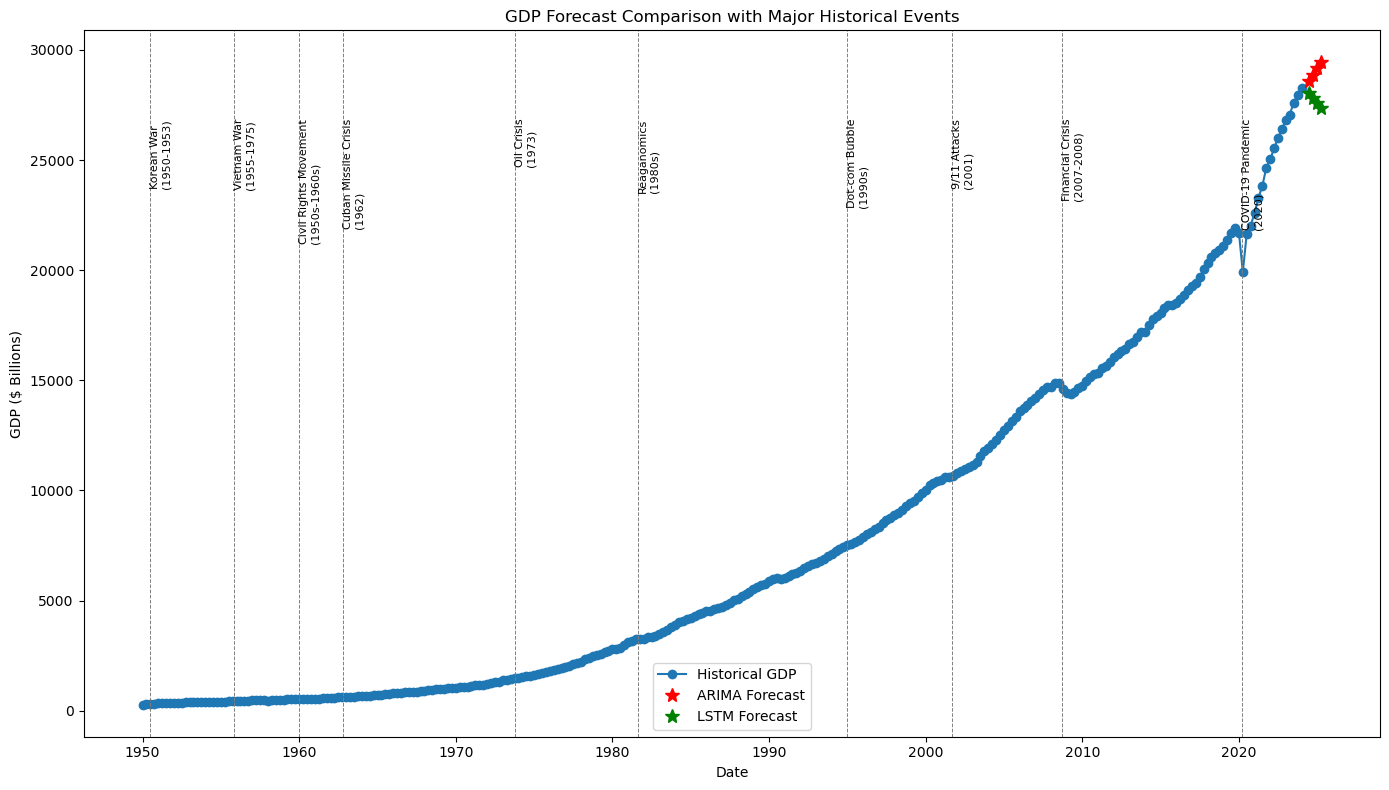

In [3]:

# Major historical events
events = {
    'Korean War\n(1950-1953)': '1950-06-25',
    'Vietnam War\n(1955-1975)': '1955-11-01',
    'Civil Rights Movement\n(1950s-1960s)': '1960-01-01',
    'Cuban Missile Crisis\n(1962)': '1962-10-16',
    'Oil Crisis\n(1973)': '1973-10-17',
    'Reaganomics\n(1980s)': '1981-08-13',
    'Dot-com Bubble\n(1990s)': '1995-01-01',
    '9/11 Attacks\n(2001)': '2001-09-11',
    'Financial Crisis\n(2007-2008)': '2008-09-15',
    'COVID-19 Pandemic\n(2020)': '2020-03-11',
}

# Plotting the combined graph
plt.figure(figsize=(14, 8))

# Plot historical data
plt.plot(df.index, df['GDP'], label='Historical GDP', marker='o')

# Plot forecasts from each model
plt.plot(forecast_dates_arima, forecast_arima, 'r*', label='ARIMA Forecast', markersize=10)
plt.plot(forecast_dates_lstm, forecast_lstm, 'g*', label='LSTM Forecast', markersize=10)
#plt.plot(forecast_dates_prophet, forecast_prophet, 'b*', label='Prophet Forecast', markersize=10)

# Mark major historical events
for event, date in events.items():
    plt.axvline(pd.to_datetime(date), color='gray', linestyle='--', linewidth=0.7)
    plt.text(pd.to_datetime(date), max(df['GDP']) * 0.95, event, rotation=90, verticalalignment='top', fontsize=8)

# Adding titles and labels
plt.title('GDP Forecast Comparison with Major Historical Events')
plt.xlabel('Date')
plt.ylabel('GDP ($ Billions)')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

```markdown
## CODE AND ANALYSIS
# Initialization and Data Fetching
- Imports: The code begins by importing necessary libraries for time series analysis, machine learning models, and data fetching.
- FRED API Initialization: The `Fred` object is initialized with an API key to fetch data from the Federal Reserve Economic Data (FRED).

```python
from fredapi import Fred
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet


# Initialize the FRED API with your API key
fred = Fred(api_key='your_api_key')

# Fetch quarterly GDP data from FRED
gdp_data = fred.get_series('GDP', observation_start='1950-01-01')

# Convert the series to a DataFrame and rename the column to 'GDP'
df = pd.DataFrame(gdp_data, columns=['GDP'])
df.index = pd.to_datetime(df.index)
```

- Fetching GDP Data: The GDP data is fetched from FRED starting from 1950.
- DataFrame Conversion: The fetched data is converted to a DataFrame and the index is set to datetime format.

## Plotting Function

```python
# Function to plot forecasts
def plot_forecast(df, forecast, forecast_dates, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['GDP'], label='Historical Data', marker='o')
    plt.plot(forecast_dates, forecast, 'r', label='Forecasted Data', markersize=10)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()
```

- Plotting Function: This function plots historical and forecasted data to visualize the predictions.

## ARIMA Forecasting

```python
# ARIMA Forecasting
model_arima = ARIMA(df['GDP'], order=(9, 1, 0))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=4)
forecast_dates_arima = pd.date_range(start=df.index[-1], periods=5, freq='Q')[1:]
```

- ARIMA Model: The ARIMA model is specified with an order of (9, 1, 0) and fitted to the data. It then forecasts GDP for the next four quarters.
- Forecast Dates: The dates for the forecasted values are generated.

## LSTM Forecasting

```python
# Normalize the data to the range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(df['GDP'].values.reshape(-1, 1))

# Function to convert time series data to supervised learning format
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    df = pd.DataFrame(data)
    cols, names = [], []
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(f'var{j+1}(t-{i})') for j in range(data.shape[1])]
    for i in range(n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(f'var{j+1}(t)') for j in range(data.shape[1])]
        else:
            names += [(f'var{j+1}(t+{i})') for j in range(data.shape[1])]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Convert the normalized series to a supervised learning format
reframed = series_to_supervised(scaled_values, 1, 1)
values = reframed.values

# Split the data into training and testing sets
n_train_time = int(len(values) * 0.9)
train = values[:n_train_time, :]
test = values[n_train_time:, :]

# Separate the inputs and outputs for training and testing sets
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# Reshape the inputs to be 3D [samples, timesteps, features] for LSTM
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mae')

# Train the LSTM model
model_lstm.fit(train_X, train_y, epochs=500, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# Forecast using the LSTM model
input_data = np.array([[df['GDP'].iloc[-1]]])
input_data = scaler.transform(input_data.reshape(1, -1))
input_data = input_data.reshape((input_data.shape[0], 1, input_data.shape[1]))

forecast_lstm = []
for i in range(4):
    forecast = model_lstm.predict(input_data)
    forecast_lstm.append(forecast[0, 0])
    input_data[0, 0, 0] = forecast[0, 0]

# Inverse transform the forecasted values to original scale
forecast_lstm = np.array(forecast_lstm).reshape(-1, 1)
forecast_lstm = scaler.inverse_transform(forecast_lstm)
forecast_lstm = forecast_lstm[:, 0]
forecast_dates_lstm = pd.date_range(start=df.index[-1], periods=5, freq='Q')[1:]
```

- Data Normalization: The GDP data is scaled to a range of (0, 1) to suit the LSTM model.
- Supervised Learning Format: The data is formatted into a supervised learning format.
- Data Splitting: The data is split into training (90%) and testing (10%) sets.
- LSTM Model: An LSTM model is built, compiled, and trained on the training data.
- Forecasting with LSTM: The model forecasts the next four quarters of GDP.

## Prophet Forecasting

```python
# Prophet Forecasting
df_prophet = df.reset_index().rename(columns={'index': 'ds', 'GDP': 'y'})
model_prophet = Prophet()
model_prophet.fit(df_prophet)
future_prophet = model_prophet.make_future_dataframe(periods=4, freq='Q')
forecast_prophet = model_prophet.predict(future_prophet)
forecast_dates_prophet = future_prophet['ds'].tail(4).values
forecast_prophet = forecast_prophet['yhat'].tail(4).values
```

- Data Preparation: The data is prepared for the Prophet model by renaming columns.
- Prophet Model: The Prophet model is initialized, fitted, and used to forecast the next four quarters of GDP.

## Plotting the Forecasts

```python
# Plotting the forecasts for each model
plot_forecast(df, forecast_arima, forecast_dates_arima, 'ARIMA Forecast for 2024', 'GDP ($ Billions)')
plot_forecast(df, forecast_lstm, forecast_dates_lstm, 'LSTM Forecast for 2024', 'GDP ($ Billions)')

# Plotting the forecast for Prophet model separately
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['GDP'], label='Historical GDP', marker='o')
plt.plot(forecast_dates_prophet, forecast_prophet, 'r', label='Forecasted GDP for 2024', markersize=10)
plt.title('Forecasted GDP for 2024 using Prophet Model')
plt.xlabel('Date')
plt.ylabel('GDP ($ Billions)')
plt.legend()
plt.tight_layout()
plt.show()
```

- Plotting: The forecasts from each model are plotted against the historical GDP data.

## Forecast Printing

```python
# Printing the forecasted values and percentage changes
models = ['ARIMA', 'LSTM', 'Prophet']
forecasts = [forecast_arima, forecast_lstm, forecast_prophet]
forecast_dates = [forecast_dates_arima, forecast_dates_lstm, forecast_dates_prophet]

for model_name, forecast, dates in zip(models, forecasts, forecast_dates):
    print(f'\n{model_name} Forecast for 2024:')
    last_observed_gdp = df['GDP'].iloc[-1]
    for date, value in zip(dates, forecast):
        # Convert numpy.datetime64 to pandas Timestamp
        date = pd.Timestamp(date)
        percentage_change = ((value - last_observed_gdp) / last_observed_gdp) * 100
        print(f"Forecasted GDP for {date.year}Q{date.quarter}: ${value:.2f}B ({percentage_change:.2f}% from last observed GDP)")
```

- Printing Forecasts: The forecasted values and their percentage changes from the last observed GDP are printed.

## Comparative Analysis with RMSE

```python
# Comparative Analysis with RMSE
# Split the data into training and testing sets for RMSE calculation
train_data = df['GDP'].iloc[:-8]  # Use all but the last 8 quarters for training
test_data = df['GDP'].iloc[-8:]   # Use the last 8 quarters for testing

# ARIMA RMSE
model_arima = ARIMA(train_data, order=(9, 1, 0))
model_fit_arima = model_arima.fit()
forecast_arima_test = model_fit_arima.forecast(steps=8)
rmse_arima = sqrt(mean_squared_error(test_data, forecast_arima_test))

# LSTM RMSE
scaled_values = scaler.fit_transform(df['GDP'].values.reshape(-1, 1))
reframed = series_to_supervised(scaled_values, 1, 1)
values = reframed.values
train = values[:-8, :]
test = values[-8:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mae')
model_lstm.fit(train_X, train_y, epochs=500, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

forecast_lstm_test = model_lstm.predict(test_X)
forecast_lstm_test = scaler.inverse_transform(forecast_lstm_test)
rmse_lstm = sqrt(mean_squared_error(test_data, forecast_lstm_test))

# Prophet RMSE
df_train_prophet = df_prophet.iloc[:-8]
df_test_prophet = df_prophet.iloc[-8:]
model_prophet = Prophet()
model_prophet.fit(df_train_prophet)
future_prophet_test = model_prophet.make_future_dataframe(periods=8, freq='Q')
forecast_prophet_test = model_prophet.predict(future_prophet_test)
forecast_prophet_test = forecast_prophet_test['yhat'].values[-8:]
rmse_prophet = sqrt(mean_squared_error(df_test_prophet['y'], forecast_prophet_test))

print(f'\nRMSE Comparison:')
print(f'ARIMA: {rmse_arima:.2f}')
print(f'LSTM: {rmse_lstm:.2f}')
print(f'Prophet: {rmse_prophet:.2f}')
```

- RMSE Calculation: The code calculates the Root Mean Squared Error (RMSE) for each model to evaluate their performance on the last 8 quarters of data.


## Analysis of the Outputs

### Forecasted GDP for 2024

- **ARIMA:**
  - Q2: $28640.61B (1.26%)
  - Q3: $28967.65B (2.42%)
  - Q4: $29312.89B (3.64%)
  - Q1 2025: $29613.79B (4.70%)

- **LSTM:**
  - Q2: $27964.36B (-1.13%)
  - Q3: $27666.21B (-2.19%)
  - Q4: $27387.97B (-3.17%)
  - Q1 2025: $27127.84B (-4.09%)

- **Prophet:**
  - Q1: $25946.44B (-8.27%)
  - Q2: $26139.74B (-7.58%)
  - Q3: $26343.76B (-6.86%)
  - Q4: $26510.48B (-6.27%)

### RMSE Comparison

- **ARIMA:** 745.86
- **LSTM:** 632.05
- **Prophet:** 2011.59

### Analysis:

- **ARIMA Model:** The ARIMA model predicts a steady increase in GDP throughout 2024. The RMSE for ARIMA is relatively low, indicating a good fit on the historical data.
  
- **LSTM Model:** The LSTM model predicts a decline in GDP for 2024. This might be due to overfitting or the sensitivity of the model to recent data points. The RMSE for LSTM is the lowest among the models, suggesting it performs well on the test set.

- **Prophet Model:** The Prophet model predicts a significant decline in GDP for 2024. The high RMSE indicates that the model did not perform well compared to ARIMA and LSTM. This might be due to the model's assumptions or the nature of the data.

### Conclusion:

- **Model Selection:** Based on RMSE, the LSTM model appears to perform the best on the test set, followed by ARIMA. However, the LSTM model's forecast shows a declining trend, which may need further investigation.
- **Forecast Insights:** The different models provide varying forecasts, highlighting the importance of model selection and evaluation in time series forecasting. It's crucial to consider both the RMSE and the plausibility of the forecasted values when making decisions based on these models.
```